 # IMDB

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


In [4]:
url='https://www.imdb.com/list/ls056092300/'

In [5]:
page= requests.get (url)

In [6]:
page

<Response [403]>

### this header is use to unblock the website

In [17]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

In [19]:
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')


In [20]:
soup

<!DOCTYPE html>
<html lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/"><head><meta charset="utf-8"/><meta content="width=device-width" name="viewport"/><script>if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }</script><script>window.addEventListener('load', (event) => {
        if (typeof window.csa !== 'undefined' && typeof window.csa === 'function') {
            var csaLatencyPlugin = window.csa('Content', {
                element: {
                    slotId: 'LoadTitle',
                    type: 'service-call'
                }
            });
            csaLatencyPlugin('mark', 'clickToBodyBegin', 1725778181211);
        }
    })</script><title>100 Best Indian Films Till Date</title><meta content="Here is the list of 100 Best Indian Films till date" data-id="main" name="description"/><script type="application/ld+json">{"@type":"ItemList","itemListElement":[{"@type":"ListItem","item":{"@type":"Movie","url

In [21]:
titles=[] # emplty list for storing
for i in soup.find_all('div', class_='ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml dli-title'):
    titles.append(i.text)
titles

['1. Ship of Theseus',
 '2. Iruvar',
 '3. Kaagaz Ke Phool',
 '4. Lagaan: Once Upon a Time in India',
 '5. Pather Panchali',
 '6. Charulata',
 '7. Rang De Basanti',
 '8. Dev.D',
 '9. 3 Idiots',
 '10. Awaara',
 '11. Nayakan',
 '12. Aparajito',
 '13. Pushpaka Vimana',
 '14. Pyaasa',
 '15. Ghatashraddha',
 '16. Sholay',
 '17. Aradhana',
 '18. Do Ankhen Barah Haath',
 '19. Bombay',
 '20. Neecha Nagar',
 '21. Do Bigha Zamin',
 '22. Garm Hava',
 '23. Piravi',
 '24. Mughal-E-Azam',
 '25. Amma Ariyan']

In [25]:
year=[] # emplty list for storing
for i in soup.find_all('div', class_='sc-b189961a-7 btCcOY dli-title-metadata'):
    year.append(i.text)
year

['20122h 19mUA',
 '19972h 20mUA',
 '19592h 28mU',
 '20013h 44mU',
 '19552h 5mU',
 '19641h 57mU',
 '20062h 47mUA',
 '20092h 24mA',
 '20092h 50mUA',
 '19513h 13mU',
 '19872h 36mA',
 '19561h 50mU',
 '19872h 5mU',
 '19572h 26mU',
 '19772h 24mA',
 '19753h 24mU',
 '19692h 49mU',
 '19572h 23mU',
 '19952h 21mU',
 '19462h 2mU',
 '19532h 11mU',
 '19742h 26m(Banned)',
 '19891h 50mUnrated',
 '19603h 17mPG',
 '19861h 55m']

In [27]:
import re
years = [re.match(r'^\d{4}', item).group(0) for item in year]
print (years)

['2012', '1997', '1959', '2001', '1955', '1964', '2006', '2009', '2009', '1951', '1987', '1956', '1987', '1957', '1977', '1975', '1969', '1957', '1995', '1946', '1953', '1974', '1989', '1960', '1986']


In [29]:
pattern = r'\d+m(.+)'

matches = [re.search(pattern, item).group(1) if re.search(pattern, item) else '' for item in year]

# Display the extracted characters
print(matches)

['UA', 'UA', 'U', 'U', 'U', 'U', 'UA', 'A', 'UA', 'U', 'A', 'U', 'U', 'U', 'A', 'U', 'U', 'U', 'U', 'U', 'U', '(Banned)', 'Unrated', 'PG', '']


In [35]:
print(len(titles),len(years), len(ratings))

25 25 25


In [37]:
# making dataframe
df= pd.DataFrame({'Titles': titles, 'Release_year': years,'Ratings': ratings})
df

Titles Release_year   Ratings
0                     1. Ship of Theseus         2012        UA
1                              2. Iruvar         1997        UA
2                     3. Kaagaz Ke Phool         1959         U
3   4. Lagaan: Once Upon a Time in India         2001         U
4                     5. Pather Panchali         1955         U
5                           6. Charulata         1964         U
6                     7. Rang De Basanti         2006        UA
7                               8. Dev.D         2009         A
8                            9. 3 Idiots         2009        UA
9                             10. Awaara         1951         U
10                           11. Nayakan         1987         A
11                         12. Aparajito         1956         U
12                   13. Pushpaka Vimana         1987         U
13                            14. Pyaasa         1957         U
14                     15. Ghatashraddha         1977         A
15                            16. Sholay         1975         U
16                          17. Aradhana         1969         U
17             18. Do Ankhen Barah Haath         1957         U
18                            19. Bombay         1995         U
19                      20. Neecha Nagar         1946         U
20                    21. Do Bigha Zamin         1953         U
21                         22. Garm Hava         1974  (Banned)
22                            23. Piravi         1989   Unrated
23                     24. Mughal-E-Azam         1960        PG
24                       25. Amma Ariyan         1986

# Bewakoof

In [40]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [42]:
url='https://shop.bewakoof.com/bestseller?sort=popular'

In [44]:
page= requests.get (url)

In [46]:
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')


In [48]:
soup

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><meta content="width=device-width" name="viewport"/><meta content="o7KS3-fVt15m4Cc1HeYh5HIpv532A4FvvYQzIf-LnsQ" name="google-site-verification"/><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="no-cache, no-store, must-revalidate" http-equiv="Cache-Control"/><meta content="no-cache" http-equiv="Pragma"/><meta content="0" http-equiv="Expires"/><meta content="EA3F0DC751089224F0A97C414E310BE8" name="msvalidate.01"/><meta content="140947639712-ukpgitufo1i1gc6nmd8o1l14tcu72nt2.apps.googleusercontent.com" name="google-signin-client_id"/><link href="https://plus.google.com/+Bewakoof/" rel="publisher"/><meta content="Bewakoof" name="application-name"/><meta content="#ffc40d" name="msapplication-TileColor"/><meta content="https://images.bewakoof.com/lib/icon/app-logo.png" name="msapplication-TileImage"/><meta content="https://files.bewakoof.com/lib/default/images_css/browserconfig.xml" name="msapplica

In [50]:
titles=[] # emplty list for storing
for i in soup.find_all('span', class_='sc-a6c4ca6a-0 PYPED'):
    titles.append(i.text)
titles

["Men's Black Adam Graphic Printed T-shirt",
 "Men's Black Warriors Graphic Printed Oversized T-shirt",
 "Women's Blue Moody Jerry Graphic Printed Oversized T-shirt",
 "Men's Black House Of The Dragon Iconic Graphic Printed T-shirt",
 "Men's Black Mickey Trio Call (DL) Graphic Printed T-shirt",
 "Men's Green Wakanda Forever Graphic Printed Oversized T-shirt",
 "Men's White Wander Geometry T-shirt",
 "Women's White & Purple Camo Printed Oversized T-shirt",
 "Men's Black Guardian Wings Graphic Printed Oversized T-shirt",
 "Men's Sun-Kissed Green T-shirt",
 "Men's Blue Rider Vroom Panda Graphic Printed T-shirt",
 "Men's Brown Shikamaru Drag Graphic Printed Oversized T-shirt",
 "Men's Green Stoned Rick & Morty Graphic Printed Oversized T-shirt",
 "Women's Green Weirdos Forever Graphic Printed Oversized T-shirt",
 "Women's Black Anti Hero Graphic Printed Oversized T-shirt",
 "Men's Blue Order of the Phoenix Graphic Printed T-shirt",
 "Men's Grey Eternity Graphic Printed Oversized T-shirt",


In [52]:
len(titles)

20

In [54]:
price=[] # emplty list for storing
for i in soup.find_all('span', class_="sc-a6c4ca6a-0 ccQTLI sc-8020ee44-11 kbHGvj"):
    price.append(i.text)
price

['₹499',
 '₹499',
 '₹499',
 '₹399',
 '₹499',
 '₹499',
 '₹499',
 '₹439',
 '₹499',
 '₹499',
 '₹499',
 '₹599',
 '₹499',
 '₹499',
 '₹499',
 '₹499',
 '₹799',
 '₹699',
 '₹599',
 '₹449']

In [62]:
image = []  # empty list for storing image URLs

for figure in soup.find_all('figure', class_='sc-8020ee44-0 eMFuRs'):
    img_tag = figure.find('img')
    
    if img_tag:
        # Trying image to get 'data-src' or 'src' because either will work in a particular website
        img_url = img_tag.get('src') 
        if img_url:
            image.append(img_url)
print(image)

['https://images.bewakoof.com/t640/men-s-black-adam-graphic-printed-t-shirt-541266-1709214736-1.jpg', 'https://images.bewakoof.com/t640/men-s-black-warriors-graphic-printed-oversized-t-shirt-519149-1715257507-1.jpg', 'https://images.bewakoof.com/t640/women-s-blue-moody-jerry-graphic-printed-oversized-t-shirt-585902-1715257595-1.jpg', 'https://images.bewakoof.com/t640/men-s-black-house-of-the-dragon-iconic-graphic-printed-t-shirt-519411-1715257899-1.jpg', 'https://images.bewakoof.com/t640/men-s-black-mickey-trio-call-dl-graphic-printed-t-shirt-276320-1717060540-1.jpg', '/images/fallback-placeholder.svg', '/images/fallback-placeholder.svg', '/images/fallback-placeholder.svg', '/images/fallback-placeholder.svg', '/images/fallback-placeholder.svg', '/images/fallback-placeholder.svg', '/images/fallback-placeholder.svg', '/images/fallback-placeholder.svg', '/images/fallback-placeholder.svg', '/images/fallback-placeholder.svg', '/images/fallback-placeholder.svg', '/images/fallback-placeholder

In [64]:
len(image)

20

In [66]:
top_10_titles = titles[:10]
top_10_prices = price[:10]
top_10_images = image[:10]


In [68]:
df = pd.DataFrame({
    'Title': top_10_titles,
    'Price': top_10_prices,
    'Image URL': top_10_images
})


In [71]:
print(df)

                                               Title Price  \
0           Men's Black Adam Graphic Printed T-shirt  ₹499   
1  Men's Black Warriors Graphic Printed Oversized...  ₹499   
2  Women's Blue Moody Jerry Graphic Printed Overs...  ₹499   
3  Men's Black House Of The Dragon Iconic Graphic...  ₹399   
4  Men's Black Mickey Trio Call (DL) Graphic Prin...  ₹499   
5  Men's Green Wakanda Forever Graphic Printed Ov...  ₹499   
6                Men's White Wander Geometry T-shirt  ₹499   
7  Women's White & Purple Camo Printed Oversized ...  ₹439   
8  Men's Black Guardian Wings Graphic Printed Ove...  ₹499   
9                     Men's Sun-Kissed Green T-shirt  ₹499   

                                           Image URL  
0  https://images.bewakoof.com/t640/men-s-black-a...  
1  https://images.bewakoof.com/t640/men-s-black-w...  
2  https://images.bewakoof.com/t640/women-s-blue-...  
3  https://images.bewakoof.com/t640/men-s-black-h...  
4  https://images.bewakoof.com/t640/men-s-

In [73]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

In [75]:
url='https://www.cnbc.com/world/?region=world'

In [77]:
page= requests.get (url)

In [79]:
page

<Response [200]>

In [81]:
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')


In [82]:
soup

<!DOCTYPE html>
<html itemscope="" itemtype="https://schema.org/WebPage" lang="en" prefix="og=https://ogp.me/ns#"><head><meta content="website" property="og:type"/><meta content="International: Top News And Analysis" property="og:title"/><meta content="CNBC International is the world leader for news on business, technology, China, trade, oil prices, the Middle East and markets." property="og:description"/><meta content="https://www.cnbc.com/world/" property="og:url"/><meta content="CNBC" property="og:site_name"/><meta content="max-image-preview:large" name="robots"/><meta content="telephone=no" name="format-detection"/><meta content="https://sc.cnbcfm.com/applications/cnbc.com/staticcontent/img/cnbc_logo_new.png?v=1524171804&amp;w=1920&amp;h=1080" itemprop="image" property="og:image"/><meta content="https://sc.cnbcfm.com/applications/cnbc.com/staticcontent/img/cnbc_logo_new.png?v=1524171804&amp;w=1920&amp;h=1080" name="twitter:image:src"/><meta content="https://sc.cnbcfm.com/applicatio

In [85]:
time=[] # emplty list for storing
for i in soup.find_all('time', class_='LatestNews-timestamp'):
    time.append(i.text)
time

['8 Hours Ago',
 '12 Hours Ago',
 '16 Hours Ago',
 '17 Hours Ago',
 '17 Hours Ago',
 '17 Hours Ago',
 '17 Hours Ago',
 '18 Hours Ago',
 '18 Hours Ago',
 '18 Hours Ago',
 '18 Hours Ago',
 '18 Hours Ago',
 '18 Hours Ago',
 '18 Hours Ago',
 '18 Hours Ago',
 '18 Hours Ago',
 '19 Hours Ago',
 '20 Hours Ago',
 '20 Hours Ago',
 '20 Hours Ago',
 'September 6, 2024',
 'September 6, 2024',
 'September 6, 2024',
 'September 6, 2024',
 'September 6, 2024',
 'September 6, 2024',
 'September 6, 2024',
 'September 6, 2024',
 'September 6, 2024',
 'September 6, 2024']

In [87]:
headline=[] # empty list for storing
for i in soup.find_all('a', class_='LatestNews-headline'):
    headline.append(i.text)
headline

["Yellen says U.S. economy remains solid, on path to 'soft landing' with no meaningful layoffs",
 'CIA director: There was risk of Russia using nuclear weapon early in Ukraine war',
 "Divorce parties reached an all-time high last year: 'It was incredibly therapeutic'",
 "3 ways Wall Street's largest banks are leveraging AI to increase profitability",
 "This luxury psilocybin retreat 'creates better leaders,' founders say",
 'Top 2 U.S. cities to retire are in Florida—No. 3 is nearly 1,800 miles away',
 'YouTube group The Try Guys quickly found success in launching subscription model',
 'CEO quit his job, bought a snack company for $250K—now it brings in $103M/year',
 "'The starving artist' is a myth, author says: How creatives sustain a career",
 'Bill Gates wants to work another 20 to 30 years, like his friend Warren Buffett',
 'Bull market limps into 2-year birthday with soft economic landing in doubt',
 'Small nuclear reactors could power the future — the challenge is getting one bu

In [89]:
links=[]
for a_tag in soup.find_all('a', class_='LatestNews-headline'):
    links.append(a_tag['href'])
links

['https://www.cnbc.com/2024/09/07/yellen-says-us-economy-remains-solid-heading-toward-soft-landing.html',
 'https://www.cnbc.com/2024/09/07/cia-director-russia-ukraine-war-nuclear-weapon-risk.html',
 'https://www.cnbc.com/2024/09/07/divorce-parties-reached-an-all-time-high-last-year-heres-why.html',
 'https://www.cnbc.com/2024/09/07/3-ways-wall-street-largest-banks-are-leveraging-ai-to-increase-profitability.html',
 'https://www.cnbc.com/2024/09/07/this-luxury-psilocybin-retreat-creates-better-leaders-founders-say.html',
 'https://www.cnbc.com/2024/09/07/wallethub-best-us-cities-to-retire.html',
 'https://www.cnbc.com/2024/09/07/the-try-guys-has-quickly-found-success-in-launching-subscription-model.html',
 'https://www.cnbc.com/2024/09/07/lesserevil-ceo-why-i-left-wall-street-for-a-failing-snack-company.html',
 'https://www.cnbc.com/2024/09/07/stacey-derasmo-what-it-takes-for-creatives-to-sustain-a-career.html',
 'https://www.cnbc.com/2024/09/07/bill-gates-retirement-sounds-awful-ill-w

In [91]:
print(len(headline),len(time), len(links))

30 30 30


In [93]:
# making dataframe
df= pd.DataFrame({'Headings': headline, 'Time': time,'News_link': links})
df

Headings               Time  \
0   Yellen says U.S. economy remains solid, on pat...        8 Hours Ago   
1   CIA director: There was risk of Russia using n...       12 Hours Ago   
2   Divorce parties reached an all-time high last ...       16 Hours Ago   
3   3 ways Wall Street's largest banks are leverag...       17 Hours Ago   
4   This luxury psilocybin retreat 'creates better...       17 Hours Ago   
5   Top 2 U.S. cities to retire are in Florida—No....       17 Hours Ago   
6   YouTube group The Try Guys quickly found succe...       17 Hours Ago   
7   CEO quit his job, bought a snack company for $...       18 Hours Ago   
8   'The starving artist' is a myth, author says: ...       18 Hours Ago   
9   Bill Gates wants to work another 20 to 30 year...       18 Hours Ago   
10  Bull market limps into 2-year birthday with so...       18 Hours Ago   
11  Small nuclear reactors could power the future ...       18 Hours Ago   
12  This gym stock is a buy because of pickleball ...       18 Hours Ago   
13  The U.S. colleges with the happiest students—A...       18 Hours Ago   
14  This semiconductor ETF just had its worst week...       18 Hours Ago   
15  Wells Fargo's top picks in September include t...       18 Hours Ago   
16  Tesla, GM, Rivian and Ford: The $100,000 elect...       19 Hours Ago   
17  Harvard nutritionist: The No. 1 ultra-processe...       20 Hours Ago   
18  Europe's economy survived 'terrible prophecies...       20 Hours Ago   
19  Automakers are getting back into advertising’s...       20 Hours Ago   
20  Coinbase has worst week of the year as crypto ...  September 6, 2024   
21  Cramer pushes back against a 'new and negative...  September 6, 2024   
22      Cramer's Lightning Round: 'I like' GE Vernova  September 6, 2024   
23  Cramer's week ahead: iPhone 16 launch, consume...  September 6, 2024   
24  Dell and Palantir to join S&P 500; shares of b...  September 6, 2024   
25  Dick Cheney will vote for Kamala Harris, says ...  September 6, 2024   
26  Flocking to defensive stocks paid off for inve...  September 6, 2024   
27  Masimo CEO shared confidential documents with ...  September 6, 2024   
28  Starboard moves to collapse News Corp's dual c...  September 6, 2024   
29  RFK Jr. is dropped from ballots in North Carol...  September 6, 2024   

                                            News_link  
0   https://www.cnbc.com/2024/09/07/yellen-says-us...  
1   https://www.cnbc.com/2024/09/07/cia-director-r...  
2   https://www.cnbc.com/2024/09/07/divorce-partie...  
3   https://www.cnbc.com/2024/09/07/3-ways-wall-st...  
4   https://www.cnbc.com/2024/09/07/this-luxury-ps...  
5   https://www.cnbc.com/2024/09/07/wallethub-best...  
6   https://www.cnbc.com/2024/09/07/the-try-guys-h...  
7   https://www.cnbc.com/2024/09/07/lesserevil-ceo...  
8   https://www.cnbc.com/2024/09/07/stacey-derasmo...  
9   https://www.cnbc.com/2024/09/07/bill-gates-ret...  
10  https://www.cnbc.com/2024/09/07/bull-market-li...  
11  https://www.cnbc.com/2024/09/07/how-small-modu...  
12  https://www.cnbc.com/2024/09/07/buy-this-gym-s...  
13  https://www.cnbc.com/2024/09/07/colleges-with-...  
14  https://www.cnbc.com/2024/09/07/this-semicondu...  
15  https://www.cnbc.com/2024/09/07/wells-fargos-t...  
16  https://www.cnbc.com/2024/09/07/tesla-gm-rivia...  
17  https://www.cnbc.com/2024/09/07/harvard-nutrit...  
18  https://www.cnbc.com/2024/09/07/eu-economy-sur...  
19  https://www.cnbc.com/2024/09/07/automakers-up-...  
20  https://www.cnbc.com/2024/09/06/coinbase-marat...  
21  https://www.cnbc.com/2024/09/06/cramer-pushes-...  
22  https://www.cnbc.com/2024/09/06/cramers-lightn...  
23  https://www.cnbc.com/2024/09/06/cramers-week-a...  
24  https://www.cnbc.com/2024/09/06/dell-and-palan...  
25  https://www.cnbc.com/2024/09/06/dick-cheney-vo...  
26  https://www.cnbc.com/2024/09/06/flocking-to-de...  
27  https://www.cnbc.com/2024/09/06/masimo-ceo-sha...  
28  https://www.cnbc.com/2024/09/06/starboard-move...  
29  http

# Keai

In [96]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [98]:
url='https://www.keaipublishing.com/en/journals/artificial-intelligence-in-agriculture/most-downloaded-articles/'

In [100]:
 page= requests.get (url)

In [102]:
page

<Response [200]>

In [104]:
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [106]:
soup


<!DOCTYPE html>

<html lang="en-GB">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<meta content="ie=edge" http-equiv="X-UA-Compatible"/><script type="text/javascript">window.NREUM||(NREUM={});NREUM.info = {"beacon":"bam.eu01.nr-data.net","errorBeacon":"bam.eu01.nr-data.net","licenseKey":"NRJS-70b3f9b2c6f17cc4471","applicationID":"304294210","transactionName":"MhBSZQoZWhdTVUYLDQtafWc7V3YBQUZdCQc1GlRyFxZAFl1aXgcQSjdVQggXXwFiWVY=","queueTime":0,"applicationTime":50,"agent":"","atts":""}</script><script type="text/javascript">(window.NREUM||(NREUM={})).init={privacy:{cookies_enabled:true},ajax:{deny_list:["bam.eu01.nr-data.net"]},distributed_tracing:{enabled:true}};(window.NREUM||(NREUM={})).loader_config={agentID:"322544468",accountID:"2916063",trustKey:"2916063",xpid:"Vg8GV1ZVCxADVFVQDgUFV1Q=",licenseKey:"NRJS-70b3f9b2c6f17cc4471",applicationID:"304294210"};;/*! For license information please see nr-loader-spa-1.2

In [108]:
paper_titles=[] # emplty list for storing
for i in soup.find_all('h2', class_='h5 article-title'):
    paper_titles.append(i.text)
paper_titles

['\n\r\n                    Implementation of artificial intelligence in agriculture for optimisation of irrigation and application of pesticides and herbicides\r\n                \n',
 '\n\r\n                    Review of agricultural IoT technology\r\n                \n',
 '\n\r\n                    Automation and digitization of agriculture using artificial intelligence and internet of things\r\n                \n',
 '\n\r\n                    A comprehensive review on automation in agriculture using artificial intelligence\r\n                \n',
 '\n\r\n                    Applications of electronic nose (e-nose) and electronic tongue (e-tongue) in food quality-related properties determination: A review\r\n                \n',
 '\n\r\n                    Towards sustainable agriculture: Harnessing AI for global food security\r\n                \n',
 '\n\r\n                    Fruit ripeness classification: A survey\r\n                \n',
 '\n\r\n                    Deep learning 

In [110]:
import re

def clean_text(text):
    text = re.sub(r'[\n\r]', '', text)
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text)
    # Strip leading and trailing spaces
    return text.strip()

# Apply the cleaning function to each title
clean_titles = [clean_text(title) for title in paper_titles]

print(clean_titles)

['Implementation of artificial intelligence in agriculture for optimisation of irrigation and application of pesticides and herbicides', 'Review of agricultural IoT technology', 'Automation and digitization of agriculture using artificial intelligence and internet of things', 'A comprehensive review on automation in agriculture using artificial intelligence', 'Applications of electronic nose (e-nose) and electronic tongue (e-tongue) in food quality-related properties determination: A review', 'Towards sustainable agriculture: Harnessing AI for global food security', 'Fruit ripeness classification: A survey', 'Deep learning based computer vision approaches for smart agricultural applications', 'A review of imaging techniques for plant disease detection', 'Transfer Learning for Multi-Crop Leaf Disease Image Classification using Convolutional Neural Network VGG', 'Comparison of CNN-based deep learning architectures for rice diseases classification', 'DeepRice: A deep learning and deep fea

In [112]:
len(clean_titles)

25

In [114]:
paper_date=[] # emplty list for storing
for i in soup.find_all('p', class_='article-date'):
    paper_date.append(i.text)
paper_date

['2020',
 '2022',
 '2021',
 'June 2019',
 '2020',
 'June 2024',
 'March 2023',
 '2022',
 '2020',
 '2022',
 'September 2023',
 'March 2024',
 'September 2024',
 'September 2024',
 'March 2024',
 'June 2023',
 'June 2024',
 '2021',
 'June 2024',
 'September 2024',
 '2022',
 'September 2023',
 '2022',
 '2020',
 '2022']

In [116]:
paper_authors=[] # emplty list for storing
for i in soup.find_all('p', class_='article-authors'):
    paper_authors.append(i.text)
paper_authors

[' Tanha Talaviya |  Dhara Shah |  Nivedita Patel |  Hiteshri Yagnik |  Manan Shah',
 ' Jinyuan Xu |  Baoxing Gu |  Guangzhao Tian',
 ' A. Subeesh |  C.R. Mehta',
 ' Kirtan Jha |  Aalap Doshi |  Poojan Patel |  Manan Shah',
 ' Juzhong Tan |  Jie Xu',
 ' Dhananjay K. Pandey |  Richa Mishra',
 ' Matteo Rizzo |  Matteo Marcuzzo |  Alessandro Zangari |  Andrea Gasparetto |  Andrea Albarelli',
 ' V.G. Dhanya |  A. Subeesh |  N.L. Kushwaha |  Dinesh Kumar Vishwakarma |  T. Nagesh Kumar |  G. Ritika |  A.N. Singh',
 ' Vijai Singh |  Namita Sharma |  Shikha Singh',
 ' Ananda S. Paymode |  Vandana B. Malode',
 ' Md Taimur Ahad |  Yan Li |  Bo Song |  Touhid Bhuiyan',
 ' P. Isaac Ritharson |  Kumudha Raimond |  X. Anitha Mary |  Jennifer Eunice Robert |  Andrew J',
 ' Sumaira Ghazal |  Arslan Munir |  Waqar S. Qureshi',
 ' Juan Felipe Restrepo-Arias |  John W. Branch-Bedoya |  Gabriel Awad',
 ' Baoling Ma |  Zhixin Hua |  Yuchen Wen |  Hongxing Deng |  Yongjie Zhao |  Liuru Pu |  Huaibo Song',
 

In [118]:
# making dataframe
df= pd.DataFrame({'Titles':clean_titles, 'Release_year': paper_date,'Authors': paper_authors})
df

Titles    Release_year  \
0   Implementation of artificial intelligence in a...            2020   
1               Review of agricultural IoT technology            2022   
2   Automation and digitization of agriculture usi...            2021   
3   A comprehensive review on automation in agricu...       June 2019   
4   Applications of electronic nose (e-nose) and e...            2020   
5   Towards sustainable agriculture: Harnessing AI...       June 2024   
6             Fruit ripeness classification: A survey      March 2023   
7   Deep learning based computer vision approaches...            2022   
8   A review of imaging techniques for plant disea...            2020   
9   Transfer Learning for Multi-Crop Leaf Disease ...            2022   
10  Comparison of CNN-based deep learning architec...  September 2023   
11  DeepRice: A deep learning and deep feature bas...      March 2024   
12  Computer vision in smart agriculture and preci...  September 2024   
13  Image classification on smart agriculture plat...  September 2024   
14  Using an improved lightweight YOLOv8 model for...      March 2024   
15  How artificial intelligence uses to achieve th...       June 2023   
16  LeafSpotNet: A deep learning framework for det...       June 2024   
17  Plant disease detection using hybrid model bas...            2021   
18  Cross-comparative review of Machine learning f...       June 2024   
19  A comprehensive survey on weed and crop classi...  September 2024   
20  A systematic review of machine learning techni...            2022   
21  Machine learning in nutrient management: A review  September 2023   
22  Deep convolutional neural network models for w...            2022   
23  A review on computer vision systems in monitor...            2020   
24  Explainable artificial intelligence and interp...            2022   

                                              Authors  
0    Tanha Talaviya |  Dhara Shah |  Nivedita Pate...  
1          Jinyuan Xu |  Baoxing Gu |  Guangzhao Tian  
2                            A. Subeesh |  C.R. Mehta  
3    Kirtan Jha |  Aalap Doshi |  Poojan Patel |  ...  
4                               Juzhong Tan |  Jie Xu  
5                 Dhananjay K. Pandey |  Richa Mishra  
6    Matteo Rizzo |  Matteo Marcuzzo |  Alessandro...  
7    V.G. Dhanya |  A. Subeesh |  N.L. Kushwaha | ...  
8        Vijai Singh |  Namita Sharma |  Shikha Singh  
9              Ananda S. Paymode |  Vandana B. Malode  
10   Md Taimur Ahad |  Yan Li |  Bo Song |  Touhid...  
11   P. Isaac Ritharson |  Kumudha Raimond |  X. A...  
12   Sumaira Ghazal |  Arslan Munir |  Waqar S. Qu...  
13   Juan Felipe Restrepo-Arias |  John W. Branch-...  
14   Baoling Ma |  Zhixin Hua |  Yuchen Wen |  Hon...  
15            Vilani Sachithra |  L.D.C.S. Subhashini  
16         Shwetha V |  Arnav Bhagwat |  Vijaya Laxmi  
17                         Punam Bedi |  Pushkar Gole  
18   James Daniel Omaye |  Emeka Ogbuju |  Grace A...  
19   Faisal Dharma Adhinata |   Wahyono |  Raden S...  
20   Md Ekramul Hossain |  Muhammad Ashad Kabir | ...  
21   Oumnia Ennaji |  Leonardus Vergütz |  Achraf ...  
22   A. Subeesh |  S. Bhole |  K. Singh |  N.S. Ch...  
23   Cedric Okinda |  Innocent Nyalala |  Tchalla ...  
24                                       Masahiro Ryo

# Patreon

In [122]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [124]:
url="https://www.patreon.com/coreyms"

In [126]:
page= requests.get(url)
page

<Response [200]>

In [127]:
# Since the website is showing <Response [200]> but still can't parse the data. therefore in my program i used..... requests.get(''https://www.patreon.com/coreyms').text. Still,I was unable to do it. If it was running then code will be the following

In [130]:
response=requests.get('https://www.patreon.com/coreyms').text
print(response)
soup = BeautifulSoup(response.content, 'html.parser')

<!DOCTYPE html><html><head><meta charSet="utf-8"/><meta name="viewport" content="width=device-width, initial-scale=1.0, viewport-fit=cover"/><meta content="artists, creators, patron, sponsor, music, videos" name="keywords"/><meta property="fb:admins" content="201564"/><meta property="fb:app_id" content="130127590512253"/><meta http-equiv="X-UA-Compatible" content="IE=edge"/><meta property="twitter:site" content="@Patreon"/><meta property="og:site-name" content="Patreon"/><meta prefix="og: http://ogp.me/ns#" property="og:site_name" content="Patreon"/><meta name="apple-mobile-web-app-title" content="Patreon"/><meta name="application-name" content="Patreon"/><link as="fetch" rel="prefetch" href="https://www.patreon.com/api/experiments/assignments?json-api-version=1.0&amp;json-api-use-default-includes=false&amp;include=[]"/><link rel="apple-touch-icon" sizes="180x180" href="https://c5.patreon.com/external/favicon/rebrand/pwa-192.png?v=af5597c2ef"/><link rel="icon" type="image/png" sizes="3

AttributeError: 'str' object has no attribute 'content'

In [138]:
soup


<!DOCTYPE html>

<html lang="en-GB">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<meta content="ie=edge" http-equiv="X-UA-Compatible"/><script type="text/javascript">window.NREUM||(NREUM={});NREUM.info = {"beacon":"bam.eu01.nr-data.net","errorBeacon":"bam.eu01.nr-data.net","licenseKey":"NRJS-70b3f9b2c6f17cc4471","applicationID":"304294210","transactionName":"MhBSZQoZWhdTVUYLDQtafWc7V3YBQUZdCQc1GlRyFxZAFl1aXgcQSjdVQggXXwFiWVY=","queueTime":0,"applicationTime":50,"agent":"","atts":""}</script><script type="text/javascript">(window.NREUM||(NREUM={})).init={privacy:{cookies_enabled:true},ajax:{deny_list:["bam.eu01.nr-data.net"]},distributed_tracing:{enabled:true}};(window.NREUM||(NREUM={})).loader_config={agentID:"322544468",accountID:"2916063",trustKey:"2916063",xpid:"Vg8GV1ZVCxADVFVQDgUFV1Q=",licenseKey:"NRJS-70b3f9b2c6f17cc4471",applicationID:"304294210"};;/*! For license information please see nr-loader-spa-1.2

In [140]:
headings = []
for i in soup.find_all('span', class_='sc-1cvoi1y-0 hxhWXn'):
    headings.append(i.text)
print(headings)

[]


In [134]:
date = []
for i in soup.find_all('a', class_='sc-kfPuZi cFsBLW'):
   date.append(i.text)
print(date)

[]


In [136]:
content= []
for i in soup.find_all('a', class_='sc-kfPuZi bnqUmv'):
   content.append(i.text)
print(content)

[]


In [142]:
likes= []
for i in soup.find_all('div', class_='sc-jrQzAO iubCOz'):
   likes.append(i.text)
print(likes)

[]


In [144]:
df= pd.DataFrame({'Headings': headings, 'Date': date,'Content':content, 'Likes': likes})
df

Empty DataFrame
Columns: [Headings, Date, Content, Likes]
Index: []

# NOBROKER

In [149]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [151]:
url='https://www.nobroker.in/'

In [153]:
 page= requests.get (url)

In [155]:
page

<Response [200]>

#### Since the website is showing <Response [200]> but still can't parse the data. therefore in my program i used..... requests.get('https://www.nobroker.in/').text. Still,I was unable to do it. If it was running then code will be the following


          <!DOCTYPE html><html lang="en"><head>
          <meta property="fb:pages" content="794951570520699" />
          <link rel="canonical" href="https://www.nobroker.in" />
          
        
          
          <link rel="dns-prefetch preconnect" href="//www.googletagmanager.com">
          <link rel="dns-prefetch preconnect"  href="//www.google-analytics.com">
          <link rel="dns-prefetch" href="//assets.nobroker.in">
          <link rel="dns-prefetch" href="//images.nobroker.in">
          <link rel="dns-prefetch preconnect" href="https://assets.adobedtm.com" />
          <link rel="shortcut icon" id="favicon" href="//assets.nobroker.in/static/img/favicon.png"/>
          <link rel="apple-touch-icon" href="https://images.nobroker.in/static/img/fav64.png">
          <link rel="dns-prefetch preconnect" href="https://hs.nobroker.in">
          <!--<meta charset="utf-8"/>-->
          <meta charset="UTF-8"/>
          <meta name="google-play-app" content="app-id=com.nobrok
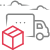
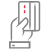
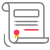
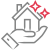
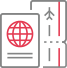
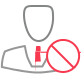
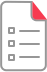
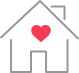
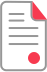
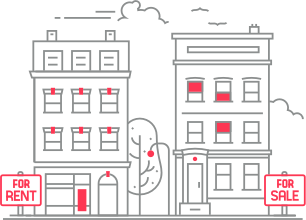

AttributeError: 'str' object has no attribute 'content'

In [158]:
response=requests.get('https://www.nobroker.in/').text
print(response)
soup = BeautifulSoup(response.content, 'html.parser')
soup

In [160]:
house_title=[]
for i in soup.find_all('span',class_="overflow-hidden overflow-ellipsis whitespace-nowrap max-w-80pe po:max-w-full"):
    house_title.append(i.text)

In [162]:
house_title

[]

In [164]:
location=[] # emplty list for storing
for i in soup.find_all('span', class_='overflow-hidden overflow-ellipsis whitespace-nowrap text-13 text-gray-lightest'):
    location.append(i.text)
location

[]

In [166]:
flat_area=[] # emplty list for storing
for i in soup.find_all('div', class_='flex heading-7'):
   flat_area.append(i.text)
flat_area

[]

In [168]:
emi=[] # emplty list for storing
for i in soup.find_all('div', class_='font-semi-bold heading-6'):
   emi.append(i.text)
emi

[]

In [170]:
price=[] # emplty list for storing
for i in soup.find_all('div', class_='font-semi-bold heading-6'):
   price.append(i.text)
price

[]

In [172]:
df= pd.DataFrame({'House_Title': house_title, 'Location': location,'EMI':emi, 'Flat_area': flat_area,'Price': price})
df

Empty DataFrame
Columns: [House_Title, Location, EMI, Flat_area, Price]
Index: []